In [8]:
from dbclient import DBClient
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [9]:
cost_num = 12
iter_num = 14

bn_minus_10 = "[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0]"
bn_minus_09 = "[-0.9, -0.9, -0.9, -0.9, -0.9, -0.9, -0.9]"
bn_minus_08 = "[-0.8, -0.8, -0.8, -0.8, -0.8, -0.8, -0.8]"
bn_minus_07 = "[-0.7000000000000001, -0.7000000000000001, -0.7000000000000001, -0.7000000000000001, -0.7000000000000001, -0.7000000000000001, -0.7000000000000001]"
bn_minus_06 = "[-0.6000000000000001, -0.6000000000000001, -0.6000000000000001, -0.6000000000000001, -0.6000000000000001, -0.6000000000000001, -0.6000000000000001]"
bn_minus_05 = "[-0.5000000000000001, -0.5000000000000001, -0.5000000000000001, -0.5000000000000001, -0.5000000000000001, -0.5000000000000001, -0.5000000000000001]"
bn_minus_04 = "[-0.40000000000000013, -0.40000000000000013, -0.40000000000000013, -0.40000000000000013, -0.40000000000000013, -0.40000000000000013, -0.40000000000000013]"
bn_minus_03 = "[-0.30000000000000016, -0.30000000000000016, -0.30000000000000016, -0.30000000000000016, -0.30000000000000016, -0.30000000000000016, -0.30000000000000016]"
bn_minus_02 = "[-0.20000000000000018, -0.20000000000000018, -0.20000000000000018, -0.20000000000000018, -0.20000000000000018, -0.20000000000000018, -0.20000000000000018]"
bn_minus_01 = "[-0.1000000000000002, -0.1000000000000002, -0.1000000000000002, -0.1000000000000002, -0.1000000000000002, -0.1000000000000002, -0.1000000000000002]"
bn_10 = "[0.09999999999999964, 0.09999999999999964, 0.09999999999999964, 0.09999999999999964, 0.09999999999999964, 0.09999999999999964, 0.09999999999999964]"
bn_09 = "[0.8999999999999995, 0.8999999999999995, 0.8999999999999995, 0.8999999999999995, 0.8999999999999995, 0.8999999999999995, 0.8999999999999995]"
bn_08 = "[0.7999999999999996, 0.7999999999999996, 0.7999999999999996, 0.7999999999999996, 0.7999999999999996, 0.7999999999999996, 0.7999999999999996]"
bn_07 = "[0.6999999999999997, 0.6999999999999997, 0.6999999999999997, 0.6999999999999997, 0.6999999999999997, 0.6999999999999997, 0.6999999999999997]"
bn_06 = "[0.5999999999999996, 0.5999999999999996, 0.5999999999999996, 0.5999999999999996, 0.5999999999999996, 0.5999999999999996, 0.5999999999999996]"
bn_05 = "[0.49999999999999956, 0.49999999999999956, 0.49999999999999956, 0.49999999999999956, 0.49999999999999956, 0.49999999999999956, 0.49999999999999956]"
bn_04 = "[0.3999999999999997, 0.3999999999999997, 0.3999999999999997, 0.3999999999999997, 0.3999999999999997, 0.3999999999999997, 0.3999999999999997]"
bn_03 = "[0.2999999999999998, 0.2999999999999998, 0.2999999999999998, 0.2999999999999998, 0.2999999999999998, 0.2999999999999998, 0.2999999999999998]"
bn_02 = "[0.19999999999999973, 0.19999999999999973, 0.19999999999999973, 0.19999999999999973, 0.19999999999999973, 0.19999999999999973, 0.19999999999999973]"
bn_01 = "[0.09999999999999964, 0.09999999999999964, 0.09999999999999964, 0.09999999999999964, 0.09999999999999964, 0.09999999999999964, 0.09999999999999964]"
bn_0 = "[-2.220446049250313e-16, -2.220446049250313e-16, -2.220446049250313e-16, -2.220446049250313e-16, -2.220446049250313e-16, -2.220446049250313e-16, -2.220446049250313e-16]"
bn_list = [bn_0, bn_01, bn_02, bn_03, bn_04, bn_05, bn_06, bn_07, bn_08, bn_09, bn_10, bn_minus_01, bn_minus_02, bn_minus_03, bn_minus_04, bn_minus_05, bn_minus_06, bn_minus_07, bn_minus_08, bn_minus_09, bn_minus_10]

In [10]:
import numpy as np

def getResultForDirect(method, nqubit, depth):
    ## init numpy array
    cost_list = np.array([])
    iter_list = np.array([])

    ## db client
    db = DBClient('data/job_results.sqlite3')
    jobs = db.selectResultsByNQubitAndDepth(nqubit, depth, method)

    if len(jobs) == 0:
        return None

    for job in jobs:
        cost_list = np.append(cost_list, float(job[5]))
        iter_list = np.append(iter_list, float(job[6]))

    return {
        "method": method,
        "depth": depth,
        "cost": {
            "min": np.min(cost_list),
            "max": np.max(cost_list),
            "mean": np.mean(cost_list),
            "std": np.std(cost_list)
        },
        "iter": {
            "min": np.min(iter_list),
            "max": np.max(iter_list),
            "mean": np.mean(iter_list),
            "std": np.std(iter_list)
        }
    }

def getResult(method, nqubit, depth, bn_type, bn_value=None):
    ## init numpy array
    cost_list = np.array([])
    iter_list = np.array([])

    ## db client
    db = DBClient('data/job_results.sqlite3')
    if bn_type == 'static':
        jobs = db.selectResultsByNQubitAndGateType(nqubit, method, bn_value, depth)
    elif bn_type == 'static_random':
        jobs = db.selectResultsByNQubitAndGateTypeAndBnType(nqubit, method, bn_type, depth)

    if len(jobs) == 0:
        return None

    for job in jobs:
        cost_list = np.append(cost_list, float(job[cost_num]))
        iter_list = np.append(iter_list, float(job[iter_num]))

    return {
        "method": method,
        "depth": depth,
        "bn_type": bn_type,
        "bn_value": str(bn_value).strip("[").strip("]").split(",")[0],
        "cost": {
            "min": np.min(cost_list),
            "max": np.max(cost_list),
            "mean": np.mean(cost_list),
            "std": np.std(cost_list)
        },
        "iter": {
            "min": np.min(iter_list),
            "max": np.max(iter_list),
            "mean": np.mean(iter_list),
            "std": np.std(iter_list)
        }
    }

In [16]:
def run(method, nqubit, depth_list, bn_type, bn_value=None):
    results = []
    for depth in depth_list:
        if method == 'direct':
            result = getResultForDirect(method, nqubit, depth)
        else:
            result = getResult(method, nqubit, depth, bn_type, bn_value)

        if result == None:
            continue
#         print("%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s" % (result["method"], result["depth"], result["bn_type"], result["bn_value"], result["cost"]["min"], result["cost"]["max"], result["cost"]["mean"], result["cost"]["std"], result["iter"]["min"], result["iter"]["max"], result["iter"]["mean"], result["iter"]["std"]))
        results.append(result)
    return results

vqe_results = []
nqubit = 7
method = 'indirect_ising'
depth_list = [16,20,24,28]
vqe_results.extend(run(method, nqubit, depth_list, 'static_random'))
for bn in bn_list:
    vqe_results.extend(run(method, nqubit, depth_list, 'static', bn))

method = 'indirect_xy'
depth_list = [12,16,20,24,28]
vqe_results.extend(run(method, nqubit, depth_list, 'static_random'))
for bn in bn_list:
    vqe_results.extend(run(method, nqubit, depth_list, 'static', bn))

method = 'indirect_xyz'
depth_list = [8,12,16,20]
vqe_results.extend(run(method, nqubit, depth_list, 'static_random'))
for bn in bn_list:
    vqe_results.extend(run(method, nqubit, depth_list, 'static', bn))

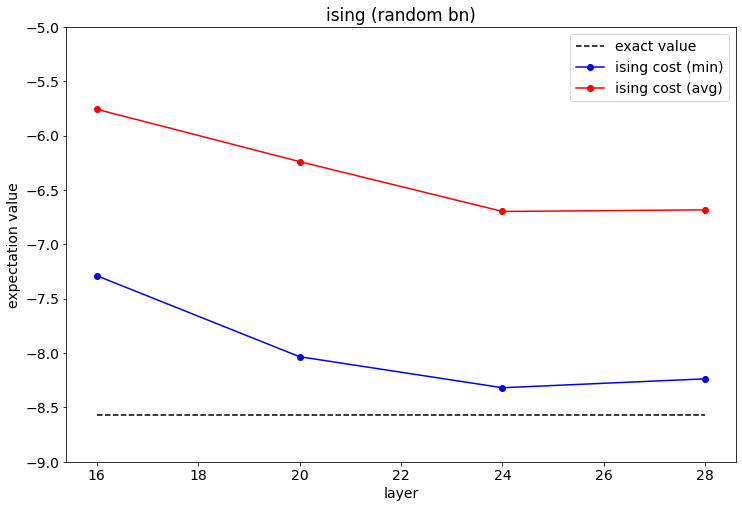

In [12]:
exact_value = -8.56677223
plot_list = {}
for result in vqe_results:
    if result['bn_type'] == 'static_random':
        if ("%s-depth" % result['method']) not in plot_list.keys():
            plot_list["%s-depth" % result['method']] = [result['depth']]
            plot_list["%s-cost-min" % result['method']] = [result['cost']['min']]
            plot_list["%s-cost-mean" % result['method']] = [result['cost']['mean']]
        else:
            plot_list["%s-depth" % result['method']].append(result['depth'])
            plot_list["%s-cost-min" % result['method']].append(result['cost']['min'])
            plot_list["%s-cost-mean" % result['method']].append(result['cost']['mean'])

def create_graph(title):
    plt.figure(figsize=(12,8))
    plt.rcParams["font.size"] = 14
    plt.title(title)
    plt.xlabel("layer")
    plt.ylabel("expectation value")
    plt.ylim(-9.0, -5.0)

create_graph("ising (random bn)")
plt.hlines(exact_value, min(plot_list['indirect_ising-depth']), max(plot_list['indirect_ising-depth']), colors='black', linestyles='dashed', label='exact value')
plt.plot(plot_list['indirect_ising-depth'], plot_list['indirect_ising-cost-min'], marker='o', color='blue', label='ising cost (min)')
plt.plot(plot_list['indirect_ising-depth'], plot_list['indirect_ising-cost-mean'], marker='o', color='red', label='ising cost (avg)')
plt.legend()
plt.savefig('ising_random_bn.png')

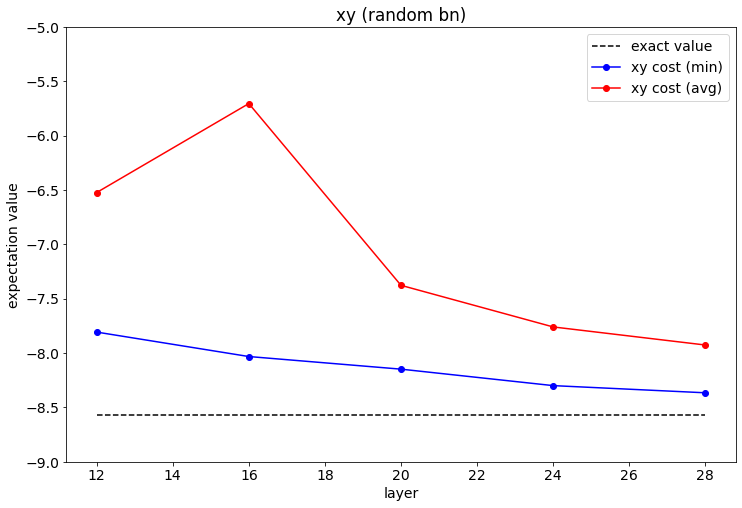

In [13]:
create_graph("xy (random bn)")
plt.hlines(exact_value, min(plot_list['indirect_xy-depth']), max(plot_list['indirect_xy-depth']), colors='black', linestyles='dashed', label='exact value')
plt.plot(plot_list['indirect_xy-depth'], plot_list['indirect_xy-cost-min'], marker='o', color='blue', label='xy cost (min)')
plt.plot(plot_list['indirect_xy-depth'], plot_list['indirect_xy-cost-mean'], marker='o', color='red', label='xy cost (avg)')
plt.legend()
plt.savefig('xy_random_bn.png')

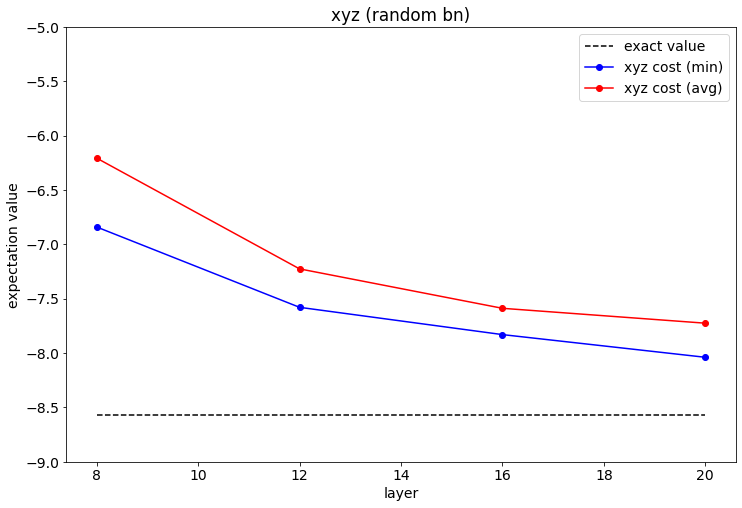

In [14]:
create_graph("xyz (random bn)")
plt.hlines(exact_value, min(plot_list['indirect_xyz-depth']), max(plot_list['indirect_xyz-depth']), colors='black', linestyles='dashed', label='exact value')
plt.plot(plot_list['indirect_xyz-depth'], plot_list['indirect_xyz-cost-min'], marker='o', color='blue', label='xyz cost (min)')
plt.plot(plot_list['indirect_xyz-depth'], plot_list['indirect_xyz-cost-mean'], marker='o', color='red', label='xyz cost (avg)')
plt.legend()
plt.savefig('xyz_random_bn.png')

{'method': 'direct', 'depth': 1, 'cost': {'min': -8.28802026748274, 'max': -8.277713467428036, 'mean': -8.284926688990904, 'std': 0.00472024885940867}, 'iter': {'min': 935.0, 'max': 2139.0, 'mean': 1344.5, 'std': 384.91018432876}}
{'method': 'direct', 'depth': 4, 'cost': {'min': -8.361123117414259, 'max': -8.343079701149293, 'mean': -8.358971557877291, 'std': 0.0053037617419112}, 'iter': {'min': 3040.0, 'max': 26532.0, 'mean': 17750.8, 'std': 5810.751290495919}}
{'method': 'direct', 'depth': 8, 'cost': {'min': -8.361504020451013, 'max': -8.361276477165013, 'mean': -8.36143457838498, 'std': 6.740705476029709e-05}, 'iter': {'min': 26913.0, 'max': 43556.0, 'mean': 31815.2, 'std': 4337.101262364069}}
{'depth': [1, 4, 8], 'cost-min': [-8.28802026748274, -8.361123117414259, -8.361504020451013], 'cost-mean': [-8.284926688990904, -8.358971557877291, -8.36143457838498]}


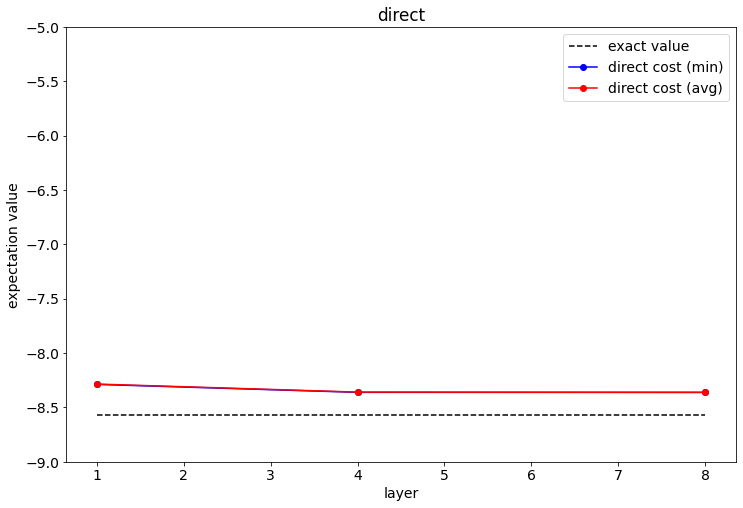

In [19]:
method = 'direct'
depth_list = [1,2,4,8]
direct_results = run(method, nqubit, depth_list, None)


d_plot_list = {}

for result in direct_results:
    print(result)
    if 'depth' not in d_plot_list.keys():
        d_plot_list["depth"] = [result['depth']]
        d_plot_list["cost-min"] = [result['cost']['min']]
        d_plot_list["cost-mean"] = [result['cost']['mean']]
    else:
        d_plot_list["depth"].append(result['depth'])
        d_plot_list["cost-min"].append(result['cost']['min'])
        d_plot_list["cost-mean"].append(result['cost']['mean'])

print(d_plot_list)
create_graph("direct")
plt.hlines(exact_value, min(d_plot_list['depth']), max(d_plot_list['depth']), colors='black', linestyles='dashed', label='exact value')
plt.plot(d_plot_list['depth'], d_plot_list['cost-min'], marker='o', color='blue', label='direct cost (min)')
plt.plot(d_plot_list['depth'], d_plot_list['cost-mean'], marker='o', color='red', label='direct cost (avg)')
plt.legend()
plt.savefig('direct.png')